In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error  # Example function from sklearn.metrics
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [8]:
data = pd.read_excel(r"C:\Users\ATOnile\Downloads\Papollo-Healtcare-Dataset.xlsx")

In [9]:
data

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount
0,23571,2022-12-31,2023-01-12,Viral Infection,General,MRI,Jay Sinha,2023-01-20,5.0,13234,11910.6
1,27781,2023-01-04,2023-01-12,Typhoid,ICU,MRI,Jaya Yaadav,2023-01-16,4.0,12241,11016.9
2,24413,2023-01-05,2023-01-12,Malaria,General,CT Scan,Jay Sinha,2023-01-15,5.0,35255,31729.5
3,27360,2023-01-05,2023-01-12,Flu,Private,X-Ray,Jaya Yaadav,2023-01-19,5.0,6582,5923.8
4,26097,2023-01-06,2023-01-12,Viral Infection,General,Blood Test,Jaya Yaadav,2023-02-06,4.9,4567,4110.3
...,...,...,...,...,...,...,...,...,...,...,...
7152,29885,2024-03-03,2024-03-07,Typhoid,Private,Blood Test,Jay Sinha,2024-03-10,5.0,2342,2107.8
7153,26517,2024-03-04,2024-03-07,Pneumonia,Private,CT Scan,Jaya Yaadav,2024-03-14,5.0,24943,22448.7
7154,28201,2024-03-05,2024-03-07,Flu,General,Blood Test,Jay Sinha,NaT,3.5,2343,2108.7
7155,24833,2024-03-06,2024-03-07,Typhoid,Private,X-Ray,Mark Joy,2024-03-15,4.9,3475,3127.5


In [10]:
data.isnull().sum()

Patient_ID                   0
Admit_Date                   0
Discharge_Date               0
Diagnosis                    0
Bed_Occupancy                0
Test                         0
Doctor                       0
Followup Date              122
Feedback                     0
Billing Amount               0
Health Insurance Amount      0
dtype: int64

In [34]:
data.dtypes

Patient_ID                          int64
Admit_Date                 datetime64[ns]
Discharge_Date             datetime64[ns]
Diagnosis                          object
Bed_Occupancy                      object
Test                               object
Doctor                             object
Feedback                          float64
Billing Amount                      int64
Health Insurance Amount           float64
dtype: object

In [12]:
data = data.drop('Followup Date',axis = 1)

In [16]:
data.isnull().sum()

Patient_ID                 0
Admit_Date                 0
Discharge_Date             0
Diagnosis                  0
Bed_Occupancy              0
Test                       0
Doctor                     0
Feedback                   0
Billing Amount             0
Health Insurance Amount    0
dtype: int64

In [20]:
occupancy = data['Bed_Occupancy'].value_counts()
occupancy.reset_index()

,Bed_Occupancy,count
0,Private,3579
1,General,2385
2,ICU,1193


In [146]:
test = data['Test'].value_counts().index
test_value = data['Test'].value_counts().values
print(test )
print(test_value )

Index(['Blood Test', 'MRI', 'CT Scan', 'X-Ray', 'Ultrasound'], dtype='object', name='Test')
[2236 1789 1342  895  895]


Index([895, 2236, 1789, 1342], dtype='int64', name='count')
[2 1 1 1]


In [121]:
diagnosis = data['Diagnosis'].value_counts()
diagnosis .reset_index()

,Diagnosis,count
0,Viral Infection,2004
1,Flu,1717
2,Malaria,1431
3,Typhoid,1145
4,Pneumonia,573
5,Fracture,287


In [36]:
numeric_data = data.select_dtypes(include =['float64','int64'])
numeric_data

,Patient_ID,Feedback,Billing Amount,Health Insurance Amount
0,23571,5.0,13234,11910.6
1,27781,4.0,12241,11016.9
2,24413,5.0,35255,31729.5
3,27360,5.0,6582,5923.8
4,26097,4.9,4567,4110.3
...,...,...,...,...
7152,29885,5.0,2342,2107.8
7153,26517,5.0,24943,22448.7
7154,28201,3.5,2343,2108.7
7155,24833,4.9,3475,3127.5


In [38]:
num_data = numeric_data.drop('Patient_ID', axis = 1)
num_data

,Feedback,Billing Amount,Health Insurance Amount
0,5.0,13234,11910.6
1,4.0,12241,11016.9
2,5.0,35255,31729.5
3,5.0,6582,5923.8
4,4.9,4567,4110.3
...,...,...,...
7152,5.0,2342,2107.8
7153,5.0,24943,22448.7
7154,3.5,2343,2108.7
7155,4.9,3475,3127.5


In [40]:
cor_matarix = num_data.corr()
cor_matarix 

,Feedback,Billing Amount,Health Insurance Amount
Feedback,1.000000,0.006163,0.006163
Billing Amount,0.006163,1.000000,1.000000
Health Insurance Amount,0.006163,1.000000,1.000000


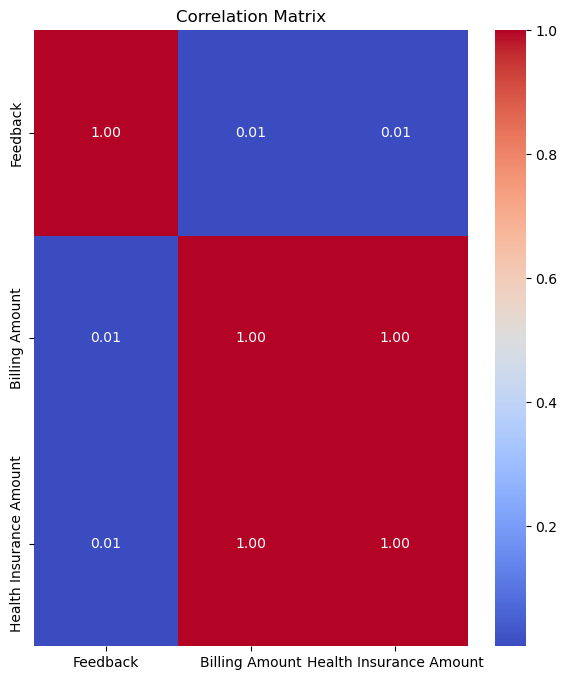

In [54]:
plt.figure(figsize=(7,8))
sns.heatmap(cor_matarix, annot = True,cmap='coolwarm', fmt='.2f' )
plt.title('Correlation Matrix')
plt.show()

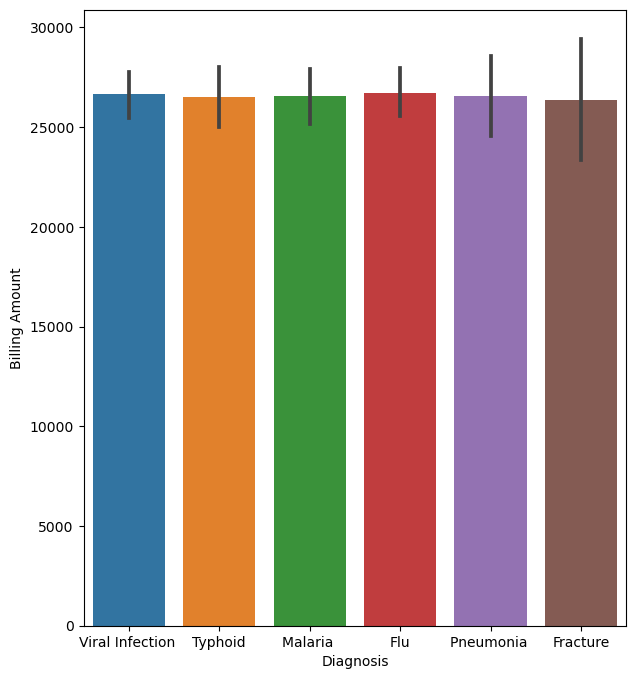

In [65]:
plt.figure(figsize=(7, 8))
sns.barplot(x='Diagnosis', y='Billing Amount', data=data)
plt.show()

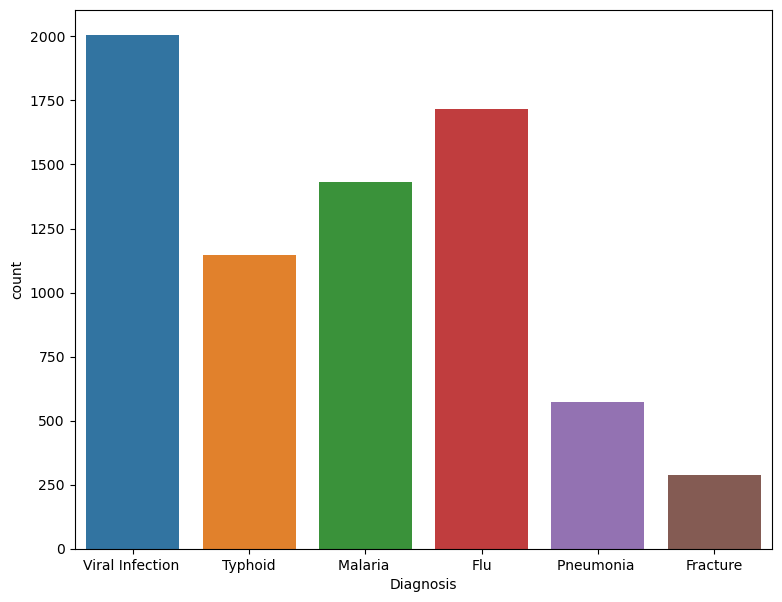

In [80]:
plt.figure(figsize=(9, 7))
sns.countplot(x='Diagnosis',  data=data)
plt.show()

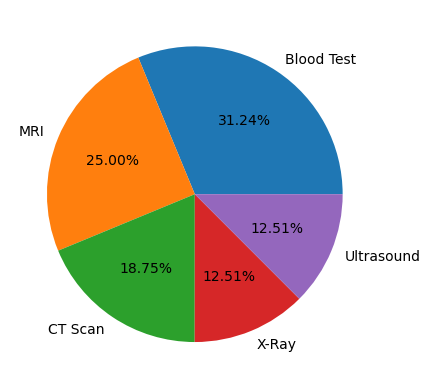

In [150]:
plt.pie(test_value,labels = test ,autopct = "%0.2f%%")
plt.show()

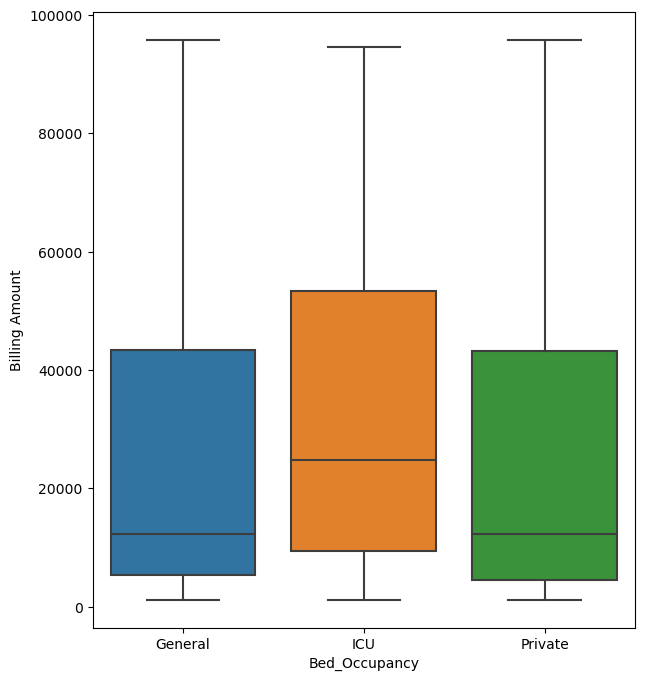

In [160]:
plt.figure(figsize=(7, 8))
sns.boxplot(x='Bed_Occupancy', y='Billing Amount', data=data)
plt.show()